In [107]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import time

# load data CIFAR10

# transform to tensor and normalize to [-1,1]
transform = transforms.Compose(
    [
#         transforms.Resize(256),
        transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 1000
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [108]:
# iter(trainloader).next()[0][0].size()

In [109]:
# iter(trainloader).next()[0].view(batch_size, -1).size()

In [110]:
%%time
# define model
class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(3072, 10)
        
    def forward(self, x):
        y_pred = F.sigmoid(self.linear(x))
        return y_pred
    
model = LogisticRegression()


CPU times: user 630 µs, sys: 220 µs, total: 850 µs
Wall time: 500 µs


In [111]:
%%time
# define a loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), 
                            lr=0.001, 
                            momentum=0.9)

CPU times: user 141 µs, sys: 3 µs, total: 144 µs
Wall time: 149 µs


In [112]:
def train_vali_split_loader(trainset, batch_size = 1024, num_workers=0):
    trainset_, valset_ = torch.utils.data.random_split(trainset, 
                              [int(0.8*len(trainset)), 
                               int(0.2*len(trainset))])
    
    trainloader_ = torch.utils.data.DataLoader(trainset_, 
                                              batch_size=batch_size,
                                              shuffle=True, 
                                              num_workers=0)
    
    valiloader_ = torch.utils.data.DataLoader(valset_, 
                                              batch_size=batch_size,
                                              shuffle=True, 
                                              num_workers=0)
    return (trainloader_, valiloader_)


In [113]:
%%time
# train the last layer of the model, using batch size 1024, 70 epochs 
# batch_size = 32
accu_train_list = []
accu_vali_list = []
for epoch in range(70):    # loop over the dataset multiple times
    # splite train into train and vali
    trainloader_, valiloader_ = train_vali_split_loader(trainset, batch_size = batch_size)
    
    running_loss = 0.0
    predicted_correct_num_train = 0
    total_train = 0
    for i, data in enumerate(trainloader_, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].view(batch_size, -1), data[1]
#         print(inputs.size())
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        batch_num = 20
        running_loss += loss.item()
        if i % batch_num == batch_num-1:      # print every 5 mini-batches
            print('[%d, %5d] loss: %0.3f'%(epoch+1,batch_size*(i+1), 
                  running_loss / batch_num))
            running_loss = 0.0
        
        # training accu
        predicted_train = torch.max(outputs, 1)
        total_train += labels.size(0)
        predicted_correct_num_train += sum(predicted_train.indices == labels)
        
    accu_train = predicted_correct_num_train.item() / total_train
    accu_train_list.append(accu_train)
    
    predicted_correct_num = 0
    total_vali = 0
    # run on vali set to get accuracy
    for i, data in enumerate(valiloader_, 0):
    # get the inputs; data is a list of [inputs, labels]
#         inputs, labels = data
        inputs, labels = data[0].view(batch_size, -1), data[1]

        predicted_vali = torch.max(model(inputs), 1)
        
        total_vali += labels.size(0)
        predicted_correct_num += sum(predicted_vali.indices == labels)
        print("Vali {0} th batch, {1} correct, validated {2}, batch size {3}".format(i, 
                                                                      predicted_correct_num,
                                                                      batch_size*(i+1), batch_size))
        
    accu_vali = predicted_correct_num.item() / total_vali
    accu_vali_list.append(accu_vali)
    
    print("Training Accu: ", accu_train)
    print("Validation Accu: ", accu_vali)
    
print('Finish Traning')

torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
[1, 20000] loss: 2.287
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
to

Vali 5 th batch, 1668 correct, validated 6000, batch size 1000
Vali 6 th batch, 1922 correct, validated 7000, batch size 1000
Vali 7 th batch, 2197 correct, validated 8000, batch size 1000
Vali 8 th batch, 2446 correct, validated 9000, batch size 1000
Vali 9 th batch, 2729 correct, validated 10000, batch size 1000
Training Accu:  0.279875
Validation Accu:  0.2729
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
[6, 20000] loss: 2.148
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size(

torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
[10, 40000] loss: 2.124
Vali 0 th batch, 289 correct, validated 1000, batch size 1000
Vali 1 th batch, 582 correct, validated 2000, batch size 1000
Vali 2 th batch, 888 correct, validated 3000, batch size 1000
Vali 3 th batch, 1181 correct, validated 4000, batch size 1000
Vali 4 th batch, 1512 correct, validated 5000, batch size 1000
Vali 5 th batch, 1816 correct, validated 6000, batch size 1000
Vali 6 th batch, 2108 correct, validated 7000, batch size 1000
Vali 7 th batch, 2406 correct, validated 8000, batch size 1000
Vali 8 th batch, 2719 correct, validated 9000, batch size 1000
Vali 9 th batch, 3011 correct, validated 10000, batch size 1000
Training Accu:  0.3031
Validation Accu:  0.3011
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])


torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
[15, 40000] loss: 2.108
Vali 0 th batch, 318 correct, validated 1000, batch size 1000
Vali 1 th batch, 630 correct, validated 2000, batch size 1000
Vali 2 th batch, 936 correct, validated 3000, batch size 1000
Vali 3 th batch, 1239 correct, validated 4000, batch size 1000
Vali 4 th batch, 1577 correct, validated 5000, batch size 1000
Vali 5 th batch, 1899 correct, validated 6000, batch size 1000
Vali 6 th batch, 2194 correct, validated 7000, batch size 1000
Vali 7 th batch, 2501 correct, validat

torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
[20, 20000] loss: 2.097
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
[20, 40000] loss: 2.096
Vali 0 th batch, 319 correct, validated 1000, batch 

Vali 6 th batch, 2349 correct, validated 7000, batch size 1000
Vali 7 th batch, 2697 correct, validated 8000, batch size 1000
Vali 8 th batch, 3006 correct, validated 9000, batch size 1000
Vali 9 th batch, 3355 correct, validated 10000, batch size 1000
Training Accu:  0.32835
Validation Accu:  0.3355
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
[25, 20000] loss: 2.089
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])

torch.Size([1000, 3072])
[29, 40000] loss: 2.087
Vali 0 th batch, 319 correct, validated 1000, batch size 1000
Vali 1 th batch, 658 correct, validated 2000, batch size 1000
Vali 2 th batch, 989 correct, validated 3000, batch size 1000
Vali 3 th batch, 1326 correct, validated 4000, batch size 1000
Vali 4 th batch, 1655 correct, validated 5000, batch size 1000
Vali 5 th batch, 1981 correct, validated 6000, batch size 1000
Vali 6 th batch, 2320 correct, validated 7000, batch size 1000
Vali 7 th batch, 2653 correct, validated 8000, batch size 1000
Vali 8 th batch, 2983 correct, validated 9000, batch size 1000
Vali 9 th batch, 3300 correct, validated 10000, batch size 1000
Training Accu:  0.334
Validation Accu:  0.33
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
tor

torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
[34, 40000] loss: 2.078
Vali 0 th batch, 340 correct, validated 1000, batch size 1000
Vali 1 th batch, 695 correct, validated 2000, batch size 1000
Vali 2 th batch, 1031 correct, validated 3000, batch size 1000
Vali 3 th batch, 1355 correct, validated 4000, batch size 1000
Vali 4 th batch, 1713 correct, validated 5000, batch size 1000
Vali 5 th batch, 2067 correct, validated 6000, batch size 1000
Vali 6 th batch, 2404 correct, validated 7000, batch size 1000
Vali 7 th batch, 2746 correct, validated 8000, batch size 1000
Vali 8 th batch, 3098 co

torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
[39, 20000] loss: 2.075
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
[39, 40000] loss: 2.074
Vali 0 th batch, 331 correct, validated 1000, batch size 1000
Vali 1 th batch, 674 correct, validated 

Vali 7 th batch, 2769 correct, validated 8000, batch size 1000
Vali 8 th batch, 3111 correct, validated 9000, batch size 1000
Vali 9 th batch, 3442 correct, validated 10000, batch size 1000
Training Accu:  0.342825
Validation Accu:  0.3442
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
[44, 20000] loss: 2.072
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size(

Vali 0 th batch, 336 correct, validated 1000, batch size 1000
Vali 1 th batch, 697 correct, validated 2000, batch size 1000
Vali 2 th batch, 1042 correct, validated 3000, batch size 1000
Vali 3 th batch, 1377 correct, validated 4000, batch size 1000
Vali 4 th batch, 1719 correct, validated 5000, batch size 1000
Vali 5 th batch, 2071 correct, validated 6000, batch size 1000
Vali 6 th batch, 2419 correct, validated 7000, batch size 1000
Vali 7 th batch, 2779 correct, validated 8000, batch size 1000
Vali 8 th batch, 3108 correct, validated 9000, batch size 1000
Vali 9 th batch, 3453 correct, validated 10000, batch size 1000
Training Accu:  0.344875
Validation Accu:  0.3453
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 307

torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
[53, 40000] loss: 2.064
Vali 0 th batch, 343 correct, validated 1000, batch size 1000
Vali 1 th batch, 683 correct, validated 2000, batch size 1000
Vali 2 th batch, 1039 correct, validated 3000, batch size 1000
Vali 3 th batch, 1375 correct, validated 4000, batch size 1000
Vali 4 th batch, 1729 correct, validated 5000, batch size 1000
Vali 5 th batch, 2080 correct, validated 6000, batch size 1000
Vali 6 th batch, 2445 correct, validated 7000, batch size 1000
Vali 7 th batch, 2774 correct, validated 8000, batch size 1000
Vali 8 th batch, 3133 correct, validated 9000, batch size 1000
Vali 9 th b

torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
[58, 20000] loss: 2.063
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
[58, 40000] loss: 2.064
Vali 0 th batch, 354 correct, validated 1000, batch size 1000
Vali 1 th batch, 695 correct, validated 2000, batch size 1000
Vali 2 th batch, 1028 correc

Vali 9 th batch, 3428 correct, validated 10000, batch size 1000
Training Accu:  0.3518
Validation Accu:  0.3428
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
[63, 20000] loss: 2.062
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([10

Vali 3 th batch, 1421 correct, validated 4000, batch size 1000
Vali 4 th batch, 1764 correct, validated 5000, batch size 1000
Vali 5 th batch, 2103 correct, validated 6000, batch size 1000
Vali 6 th batch, 2464 correct, validated 7000, batch size 1000
Vali 7 th batch, 2825 correct, validated 8000, batch size 1000
Vali 8 th batch, 3178 correct, validated 9000, batch size 1000
Vali 9 th batch, 3543 correct, validated 10000, batch size 1000
Training Accu:  0.351525
Validation Accu:  0.3543
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
torch.Size([1000, 3072])
[68, 200

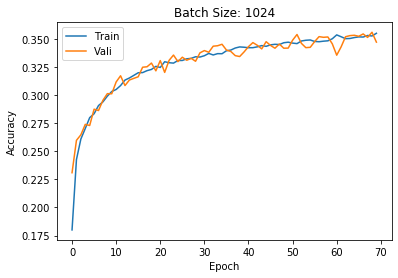

CPU times: user 164 ms, sys: 17.6 ms, total: 182 ms
Wall time: 222 ms


In [115]:
%%time
# plot accu with epoch
plt.plot(range(70), accu_train_list, label="Train")
plt.plot(range(70), accu_vali_list, label="Vali")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Batch Size: 1024")
plt.legend()
plt.show()